In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Save ID columns
train_ID = train_df['Id']
test_ID = test_df['Id']

# Drop ID columns
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)


In [ ]:
# Combine datasets for consistent preprocessing
y = train_df["SalePrice"]
full_df = pd.concat([train_df.drop("SalePrice", axis=1), test_df], axis=0)

# Fill numerical features with median, categorical with mode
for col in full_df.columns:
    if full_df[col].dtype == "object":
        full_df[col] = full_df[col].fillna(full_df[col].mode()[0])
    else:
        full_df[col] = full_df[col].fillna(full_df[col].median())


In [ ]:
full_df = pd.get_dummies(full_df)


In [ ]:
scaler = StandardScaler()
full_scaled = scaler.fit_transform(full_df)

# Split back into train and test
X = full_scaled[:len(train_df)]
X_test_final = full_scaled[len(train_df):]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)


In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 28621.90768472643
R² Score: 0.893197032644401


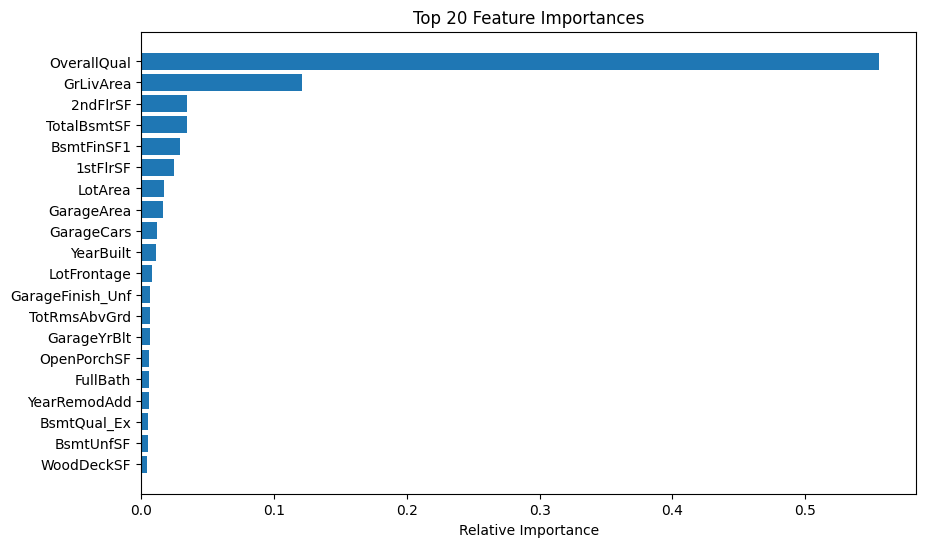

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features
features = np.array(full_df.columns)[indices]

plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
test_preds = model.predict(X_test_final)

# Submission file
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": test_preds
})
submission.to_csv("house_price_submission.csv", index=False)
